# Hantush wells introduction type curves

IHE, module transient groundwater

Olsthoorn, 2019-01-03

Hantush (1956) considered the transient flow due to a well with a constant extraction since $t=0$ placed in a uniform confined aquifer of infinite extent covered by a layer with constant vertical resistance $c$ above which a constant head is maintained.

The partial differential equation now contains the leakage between the aquifer and the layer with maintained head.

$$ \frac {\partial s^2} {\partial r^2} + \frac 1 r \frac {\partial \phi} {\partial r} 
- \frac s {kD c} = \frac S {kD} \frac {\partial s} {\partial t} $$

$$ s(x, t) = 0$$

$$ Q = kD (2 \pi r) \frac {\partial \phi} {\partial r}, \,\,\, \mathtt{for}\,\,\, r=r_0 $$

The solution may be opbtained by straighforward Lapace transformation and looking up de result from the Laplace inversions table. It reads with
$$ \lambda = \sqrt{ kD c} $$

$$ s(r, t) = \frac Q {4 \pi kD} W_h(u, \frac r \lambda),\,\,\,\, u = \frac {r^2 S} {4 kD t}$$

where $W_h(..)$ is the so-called Hantush well function, which, obviously differs from the Theis well function

Theis:

$$ W(z) = \mathtt{exp1}(z) = \intop _z ^\infty \frac {e^{-y}} {y} dy $$

Hantush:

$$ W_h(z, \rho) = \intop_u ^\infty \frac {e^{-y-\left(\frac \rho 2 \right)^2}} y dy $$

with $\rho = \frac r \lambda $ and $u = \frac {r^2 S} {4 kD t} $

An alternative expression is

$$ W_h(u,\rho) = \sum _{n=0} ^\infty \frac {(-1)^n} {n!} \left( \frac {\rho ^2} {4u}\right) ^{n} E_{n+1}
\left( u \right) $$

$$ E_{n+1} = \frac 1 n \left\{e^{-u} - u E_n(u) \right\}, \,\,\, (n = 1, 1, 3 ...) $$

The exponential integral lives in scipy special as the function $\mathtt{exp1}(z)$ and can readily be imported. The Hantush well function is not available in the `scipy.special` libary, so we have to implement it.


In [1]:
from scipy.special import exp1
import numpy as np
import matplotlib.pyplot as plt

## Implementing the integral

In [71]:

def WH(U, rho):
    '''Collect results of individual values of u'''
    W = np.zeros_like(U)
    for i, u in enumerate(U):
        W[i] = Wh(u, rho)
    return W


def Wh(u, rho):
    '''Hantush well function implemented as integral'''
    uMax = 30.
    y  = np.logspace(np.log10(u), np.log10(uMax), 1000)
    dy = np.diff(y)
    ym = 0.5 * (y[:-1] + y[1:])
    return np.sum(np.exp(-ym - rho**2 / 4 /ym)  / ym * dy)

def WH2(U, rho):
    '''return resutls for all values of u'''
    W = np.zeros_like(U)
    for i, u in enumerate(U):
        W[i] = Wh2(u, rho)
    return W

def Wh2(u, rho, tol=1e-14):
    '''Hantush well function implemented as power series
    
    This implementation works but has a limited reach; for very small
    values of u (u<0.001) the solution will deteriorate into nonsense,
    '''
    #import pdb
    #pdb.set_trace()
    tau = (rho/2)**2 / u
    f0 = 1
    E =  exp1(u)
    w0= f0 * E
    W = w0
    for n in range(1, 500):
        E = (1/n) * (np.exp(-u) - u * E)
        f0 = -f0 / n * tau
        w1 = f0 * E
        #print(w1)
        if abs(w0 + w1) < tol: # use w0 + w1 because terms alternate sign
            #print('succes')
            break
        W += w1
        w0 = w1 # remember previous value
    return W
    

How does the drawdown behave for diffent distances from the well?

For this assume a real situation.

## Hantush Type curves

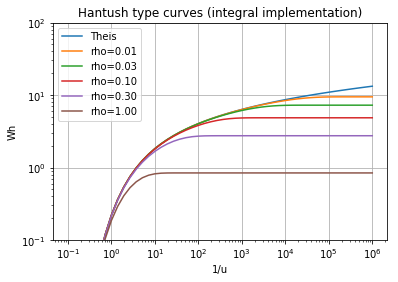

In [3]:
u = np.logspace(-6, 1)
rhos = [0.01, 0.03, 0.1, 0.3, 1]

plt.title('Hantush type curves (integral implementation)')
plt.xlabel('1/u')
plt.ylabel('Wh')
plt.xscale('log')
plt.yscale('log')
plt.ylim((0.1, 100))
plt.grid()

plt.plot(1/u, exp1(u), label='Theis')
for rho in rhos:
    plt.plot(1/u, WH(u, rho), label='rho={:.2f}'.format(rho))
    
plt.legend()
plt.show()

## Hantush type curves, implemented as power series

In [66]:
Wh2(1e-2, 0.001)

-2.3741763449594672e-05
1.5321142630770784e-10
-8.551623855098275e-16
4.015161174270875e-21
succes


4.037905834927875

In [67]:
Wh(1e-2, 0.001)

4.0378762470001295

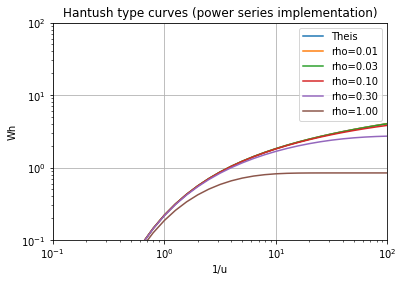

In [75]:
u = np.logspace(-2, 2, 41)
rhos = [0.01, 0.03, 0.1, 0.3, 1]

plt.title('Hantush type curves (power series implementation)')
plt.xlabel('1/u')
plt.ylabel('Wh')
plt.xscale('log')
plt.yscale('log')
plt.ylim((0.1, 100))
plt.xlim((0.1, 100))
plt.grid()

plt.plot(1/u, exp1(u), label='Theis')
for rho in rhos:
    plt.plot(1/u, WH2(u, rho), label='rho={:.2f}'.format(rho))
    
plt.legend()
plt.show()

The series does not work for $u<10^{-2}$